# Exploratory Data Analysis (EDA)

Utilizando el dataset de Olist, una plataforma de comercio electrónico brasileña, se plantea la hipótesis de que es posible predecir qué clientes presentan un patrón de comportamiento asociado al abandono del servicio (churn).

Esta métrica es crucial para las empresas, ya que permite identificar de forma anticipada a los clientes en riesgo y aplicar estrategias de retención proactivas, lo cual puede traducirse en una mejora directa en los ingresos y en la fidelización a largo plazo.

El conjunto de datos abarca compras realizadas entre septiembre de 2016 y octubre de 2018, e incluye información detallada sobre los pedidos, pagos, entregas, localización del cliente y puntuaciones de reseñas.

Para efectos de este análisis, se define churn como aquellos clientes que no han realizado ninguna compra en los últimos 6 meses del periodo registrado. Esta ventana temporal es razonable dado el tipo de productos vendidos en la plataforma, que no exigen compras frecuentes ni suscripciones.

### Importado de librerias y dataset

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium

In [2]:
BASE_DIR = Path.cwd().parent
DATA_DIR = (BASE_DIR / "data").resolve()

df = pd.read_csv(DATA_DIR/"processed/processed_dataset.csv")

### Observación general

Lo primero es realizar una observación general del dataset

In [3]:
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,payment_type,...,worst_review,mean_review_score,last_review,review_comment_message,review_comment_title,total_price,item_count,total_freight_value,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71,voucher,...,4,4.0,4,"Não testei o produto ainda, mas ele veio corre...",NaN,29.99,1,8.72,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,boleto,...,4,4.0,4,Muito bom o produto.,Muito boa a loja,118.70,1,22.76,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,credit_card,...,5,5.0,5,NaN,NaN,159.90,1,19.22,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,credit_card,...,5,5.0,5,O produto foi exatamente o que eu esperava e e...,NaN,45.00,1,27.20,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,credit_card,...,5,5.0,5,NaN,NaN,19.90,1,8.72,santo andre,SP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       97916 non-null  object 
 1   customer_id                    97916 non-null  object 
 2   order_status                   97916 non-null  object 
 3   order_purchase_timestamp       97916 non-null  object 
 4   order_approved_at              97902 non-null  object 
 5   order_delivered_carrier_date   96925 non-null  object 
 6   order_delivered_customer_date  95829 non-null  object 
 7   order_estimated_delivery_date  97916 non-null  object 
 8   total_payment                  97916 non-null  float64
 9   payment_type                   97916 non-null  object 
 10  max_installments               97916 non-null  int64  
 11  total_reviews                  97916 non-null  int64  
 12  worst_review                   97916 non-null 

Las columnas de fechas, estan en formato object, hay que cambiarlas a datetime

In [5]:
date_cols = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
    ]

for col in date_cols:
    df[col] = pd.to_datetime(df[col])

Una vez hecho esto comprobare los datos nulos de mi dataset, por el preproceso de estos datos, se que hay datos nulos en las columnas de reviews, vamos a ver que mas columnas pueden tener datos nulos, que tenemos que tener en cuenta.

In [6]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date       991
order_delivered_customer_date     2087
order_estimated_delivery_date        0
total_payment                        0
payment_type                         0
max_installments                     0
total_reviews                        0
worst_review                         0
mean_review_score                    0
last_review                          0
review_comment_message           57605
review_comment_title             86452
total_price                          0
item_count                           0
total_freight_value                  0
customer_city                        0
customer_state                       0
dtype: int64

## Declaracion de mi variable Churn o Target

Como he indicado anteriormente, se considerara como Churn(abandono del servicio), cuando un cliente no haya utilizado la plataforma en los ultimos 6 meses. De esta manera, evitamos calificar como Churn la mayoria de compras estacionales y podemos afinar mejor nuestra prediccion.

Aun asi, comprobare las metricas de Churn para 3 meses y un año y las comparare con la metrica de Churn que he elegido, para ver como varia mi target.

In [7]:
# Lo primero es obtener las ultimas compras de cada cliente, para ello hay que comprobar que sean unicos nuestros codigos de cliente
print('Hay', df['order_id'].duplicated().sum(), 'order_id duplicados')
print('Hay', df['customer_id'].duplicated().sum(), 'customer_id duplicados')

Hay 0 order_id duplicados
Hay 0 customer_id duplicados


In [8]:
def churn_rate(df, days):
    last_purchase = df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
    cutoff_date = df["order_purchase_timestamp"].max() - pd.Timedelta(days=days)
    last_purchase["churn"] = last_purchase["order_purchase_timestamp"] < cutoff_date
    churn_ratio = last_purchase["churn"].value_counts(normalize=True)
    print(f"\nVentana: {days} días")
    print(churn_ratio.round(3))

for days in [90, 180, 365]:
    churn_rate(df, days)


Ventana: 90 días
churn
True     0.816
False    0.184
Name: proportion, dtype: float64

Ventana: 180 días
churn
True     0.611
False    0.389
Name: proportion, dtype: float64

Ventana: 365 días
churn
False    0.764
True     0.236
Name: proportion, dtype: float64


#TODO Asignar variable Churn y explicar las 3 ventanas 

Se puede observar lo siguiente dependiendo de cada una de las ventanas de Churn analizadas:
- 90 dias: con esta ventana, podemos observar un Churn extremadamenter alto, que llega al 81%. Descartare esta ventana, dado que es demasiado alta, incluso para un negocio de e-commerce que tradicionalmente tiene Churn mas alto que otros tipos de negocio.
- 180 dias: el Churn es del 61%, si bien esto es elevado, dentro del contexto de un e-commerce, esta metrica se acerca mas a la realidad, hay un elevado numero de compras esporadicas, pero en esta ventana de tiempo, evitamos incluir a clientes que hacen compras estacionales que si incluimos dentro de los 90 dias.
- 365 dias: aqui el churn se invierte y pasamos a tener solo 23% unicamente, esto se asemeja mas o otros tipos de negocios, como SaaS.

Como conclusion, utilizare la metrica de 180 dias. La metrica de 90 dias es demasiado restrictiva y la metrica de 365 dias es demasiado permisiva. En negocios del tipo e-commerce, como ya he comentado antes, es normal tener un churn elevado. 

Con la metrica de 90 dias, clasificariamos como Churn a muchos clientes que acaban volviendo a comprar. En cambio con la metrica de 365, los clientes que detectamos como churn son clientes que posiblemente ya hayan abandonado el servicio. En cambio con la metrica de 180 dias, podemos hacer una deteccion temprana de un gran numero de ellos y actuar para evitar que eviten el servicio.

In [9]:
last_purchase = df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
cutoff_date = df["order_purchase_timestamp"].max() - pd.Timedelta(days=180)
last_purchase["churn"] = last_purchase["order_purchase_timestamp"] < cutoff_date
churn_ratio = last_purchase["churn"].value_counts(normalize=True)
print(f"\nVentana: {180} días")
print(churn_ratio.round(3))

df['churn'] = last_purchase["churn"]

df


Ventana: 180 días
churn
True     0.611
False    0.389
Name: proportion, dtype: float64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,payment_type,...,mean_review_score,last_review,review_comment_message,review_comment_title,total_price,item_count,total_freight_value,customer_city,customer_state,churn
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71,voucher,...,4.0,4,"Não testei o produto ainda, mas ele veio corre...",NaN,29.99,1,8.72,sao paulo,SP,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46,boleto,...,4.0,4,Muito bom o produto.,Muito boa a loja,118.70,1,22.76,barreiras,BA,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12,credit_card,...,5.0,5,NaN,NaN,159.90,1,19.22,vianopolis,GO,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20,credit_card,...,5.0,5,O produto foi exatamente o que eu esperava e e...,NaN,45.00,1,27.20,sao goncalo do amarante,RN,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62,credit_card,...,5.0,5,NaN,NaN,19.90,1,8.72,santo andre,SP,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97911,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,85.08,credit_card,...,5.0,5,NaN,NaN,72.00,1,13.08,sao jose dos campos,SP,False
97912,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,195.00,credit_card,...,4.0,4,So uma peça que veio rachado mas tudo bem rs,NaN,174.90,1,20.10,praia grande,SP,False
97913,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,271.01,credit_card,...,5.0,5,Foi entregue antes do prazo.,NaN,205.99,1,65.02,nova vicosa,BA,False
97914,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,441.16,credit_card,...,2.0,2,Foi entregue somente 1. Quero saber do outro p...,NaN,359.98,2,81.18,japuiba,RJ,False


Con esto tengo la variable Churn establecida. 

Estas proporciones nos indican que estamos ante un dataset desbalanceado, la mayoria de clientes abandonan el servicio.

Esto es un comportamiento normal en servicios de e-commerce a diferencia de servicios tipo SaaS en los que se utilizan servicios de suscripcion y hay sistemas de fidelizacion. En estos servicios el Churn es muy inferior.

## Valores nulos

A parte de las que tenemos, hemos descubierto que tenemos datos nulos en las columnas:
- *'order_approved_at'*: tenemos 14 datos nulos en esta columna, esto puede ser por ordenes canceladas, tendremos que tenerlo en cuenta y comprobarlo, comparando el *'order_status'* con estos valores nulos.
- *'order_delivered_carrier_date'*: 991 datos nulos, esta columna nos indica la fecha de entrega a la empresa de transporte, el motivo de estos datos nulos, puede ser el mismo que el anterior, pedidos cancelados, tendremos que comprobarlo igualmente para saber como imputarlo.
- *'order_delivered_customer_date'*: En este caso tenemos 2087, esta columna representa la fecha de entrega al cliente, este es un dato importante, teniendo en cuenta que el dato aumenta, puede significar, pedidos que no han llegado al cliente, puede ser un indicador de baja satisfaccion que influya en el Churn.

#### Valores nulos *'order_approved_at'*

In [10]:
df[df['order_approved_at'].isnull()] 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,payment_type,...,mean_review_score,last_review,review_comment_message,review_comment_title,total_price,item_count,total_freight_value,customer_city,customer_state,churn
5252,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,349.01,boleto,...,4.0,4,"Muita demora, mas, tudo ok.\r\nTerezinha",NaN,309.90,1,39.11,cotia,SP,True
16346,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,396.86,boleto,...,5.0,5,NaN,NaN,379.00,1,17.86,novo hamburgo,RS,False
18765,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,65.52,boleto,...,5.0,5,NaN,NaN,49.99,1,15.53,sao paulo,SP,False
22338,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,106.81,boleto,...,5.0,5,NaN,NaN,79.99,1,26.82,caninde,CE,False
22825,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,95.76,boleto,...,5.0,5,NaN,NaN,79.99,1,15.77,macae,RJ,True
26412,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,54.51,boleto,...,4.0,4,Bom custo x benefício pra proteger o crânio da...,NaN,39.99,1,14.52,santos,SP,False
37723,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27,163.43,boleto,...,5.0,5,Excelente produto,NaN,149.80,1,13.63,sao paulo,SP,False
38740,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22,39.95,boleto,...,5.0,5,"o produto chegou antes do prazo, é muito bom",NaN,28.99,1,10.96,varzea paulista,SP,True
47658,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16,60.42,boleto,...,2.0,2,Não gostei. O material não é tão bom. A cor do...,NaN,45.90,1,14.52,conselheiro lafaiete,MG,False
60807,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,154.23,boleto,...,5.0,5,NaN,NaN,135.00,1,19.23,abaete,MG,True


Como son pocas columnas he podido hacer una inspeccion de todas ellas, parece ser que mi idea inicial es incorrecta, los productos han sido entregados aunque no aparezca la fecha de aprobacion. Por lo tanto esta columna no podra aportarmos mayor informacion y la descartare.

#### Valores nulos *'order_delivered_carrier_date'*

In [11]:
df[df['order_delivered_carrier_date'].isna()].groupby('order_status').size()

order_status
approved         2
canceled       379
delivered        2
invoiced       307
processing     295
unavailable      6
dtype: int64

He filtrado los datos nulos de esta columna por su order status y los he agrupado, de esta manera puedo intentar obtener informacion de porque existen estos valores nulos.

El resultado es que solo 2 de ellas fueron entregadas. Esto podria ser un indicador de bajo nivel de satisfaccion que podria afectar al Churn

#### Valores nulos *'order_delivered_customer_date'*

In [12]:
df[df["order_delivered_customer_date"].isna() & df["order_delivered_carrier_date"].isna()] \
    .groupby("order_status").size().sum()

990

La columnas *'order_delivered_carrier_date'* tiene los datos missing que tiene la columna *'order_delivered_customer_date'*, por lo tanto podre descartar la primera, ya que me da informacion redundante.

Una vez revisado todo esto, mi decision es descartar las dos primeras columnas y me quedarme solo con *'order_delivered_customer_date'*, los datos nulos los tomare como que el producto no ha sido entregado.

La razon de esto es que estas columnas no me aportan informacion extra, la comparacion mas adelante la hare entre la fecha de entrega y la estimada, para saber si hubo algun retraso que pueda afectar a la satisfaccion del cliente

In [13]:
df.drop(columns=['order_delivered_carrier_date', 'order_approved_at'], inplace=True)

# 

# Analisis Univariante

Para este analisis, utilizare las unicamente las variables categoricas y numericas, posteriormente hare una analisis time series para sacar otras conclusiones y utilizare tecnicas de NLP para analizar las reviews

### Variable Churn

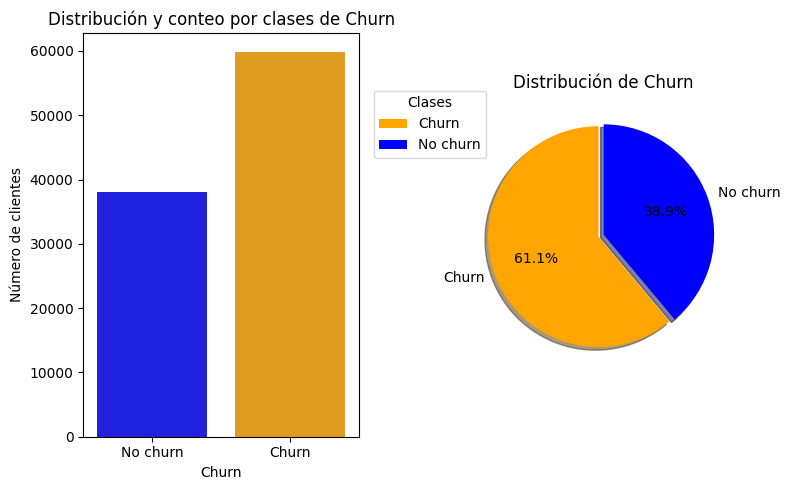

In [14]:
churn_counts = df["churn"].value_counts()
label_map = {True: "Churn", False: "No churn"}
labels = [label_map[val] for val in churn_counts.index]
palette = ["blue", "orange"]

fig, ax = plt.subplots(1, 2, figsize=(8, 5))

sns.countplot(x="churn", data=df, ax=ax[0], palette=palette, hue='churn', legend=False)
ax[0].set_title("Distribución y conteo por clases de Churn")
ax[0].set_xlabel("Churn")
ax[0].set_ylabel("Número de clientes")
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(labels[::-1])

ax[1].pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.05, 0), shadow={'ox': -0.02}, colors=reversed(palette))
ax[1].set_title("Distribución de Churn")
ax[1].legend(labels, title="Clases", loc="center right", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

Podemos observar en estos graficos, que mi clase mayoritaria es Churn con un 61% de clientes que abandonan el servicio. Como he comentado antes, en un negocio de e-commerce esta metrica es normal, porque son muchos los clientes que compran algun articulo en especifico y no vuelven a realizar compras.

Tambien podemos observar que son unos 40.000 clientes habituales y unos 60.000 son los que lo han utilizado alguna vez pero no hemos conseguido retener en el servicio.

En nuestro estudio, tener esto en cuenta indispensable para intentar mejorar nuestra estrategia y detectar los patrones de los clientes que usan el servicio habitualmente.

Antes de continuar voy a dividir en listas, mis variables categoricas y mis variables numericas para poder graficarlas mas adelante.

Ademas, voy a eliminar la variable order_id, ya que mi variable unica es customer_id y ya he elimnado duplicados y creado la variable item_count con ella en el preprocesado.

In [15]:
df.drop('order_id', axis=1, inplace=True)

variables_categoricas = [                    # ID único de la orden          # ID único del cliente
    'order_status',                # Estado de la orden 
    'payment_type',                # Tipo de pago 
    'customer_city',               # Ciudad del cliente 
    'customer_state' 
]

variables_numericas = [
    'total_payment',               # Pago total (float64)
    'max_installments',            # Máximo de cuotas (int64)
    'total_reviews',               # Total de reseñas (int64)
    'worst_review',                # Peor reseña (int64)
    'mean_review_score',           # Puntuación media de reseñas (float64)
    'last_review',                 # Última reseña (int64)
    'total_price',                 # Precio total (float64)
    'item_count',                  # Cantidad de artículos (int64)
    'total_freight_value'          # Valor total del flete (float64)
]

### Varibles categorias

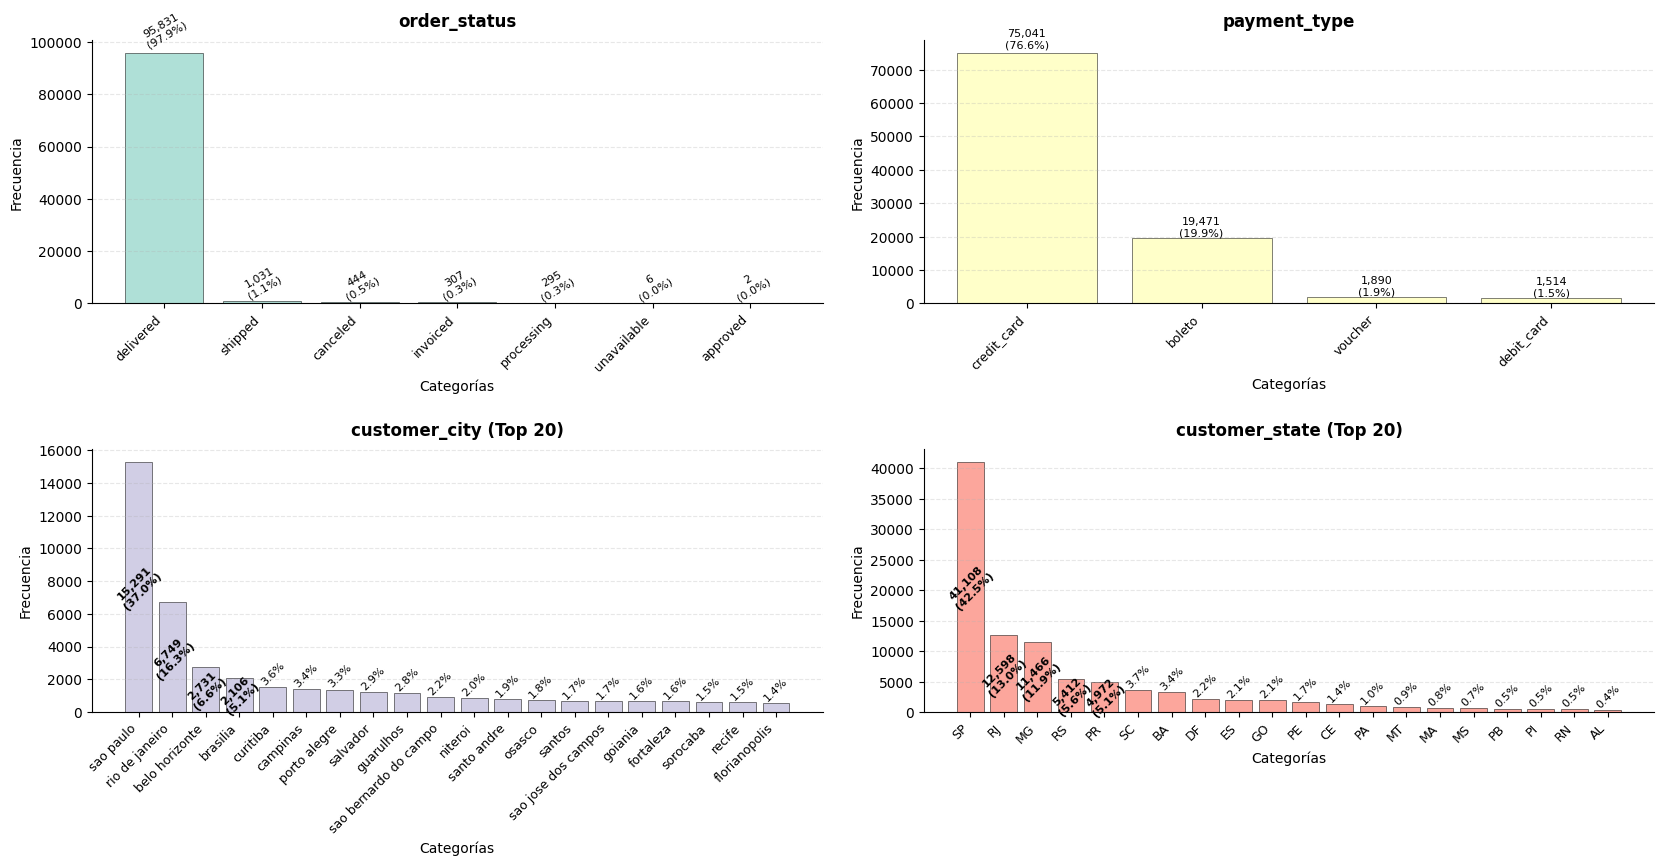

In [16]:
from utils import graficar_categoricas

graficar_categoricas(df=df, cat_var=variables_categoricas, figsize=(17,9))

Observando estas graficas podemos sacar las siguientes conclusiones:

- Mas del 95% de todos los productos han sido entregados al momento de realizar este estudio.

- Aproximadamento un 76% de todos los clientes realizan el pago de sus compras con tarjeta de credito, los cupones(voucher) y las tarjetas de debito estan en la zona mas baja sin llegar al 2% y 
por ultimo el boleto, que tiene un 20% de cuota proximadamente.

- Las ciudades con mayor volumen de pedidos son Sao Paulo con 37% y Rio de Janeiro con 16%.

- El estado con mayor numero de pedidos es SP(Sao Paulo) con un 42.5%, lo que concuerda con lo visto en el anterior punto, siendo Sao Paulo(ciudad) la que registra mayor volumen.

### Variables numericas

🔍 TIPOS DE VARIABLES DETECTADOS:
📊 total_payment: CONTINUA
📊 max_installments: DISCRETA
📊 total_reviews: ORDINAL
📊 worst_review: ORDINAL
📊 mean_review_score: ORDINAL
📊 last_review: ORDINAL
📊 total_price: CONTINUA
📊 item_count: DISCRETA
📊 total_freight_value: CONTINUA



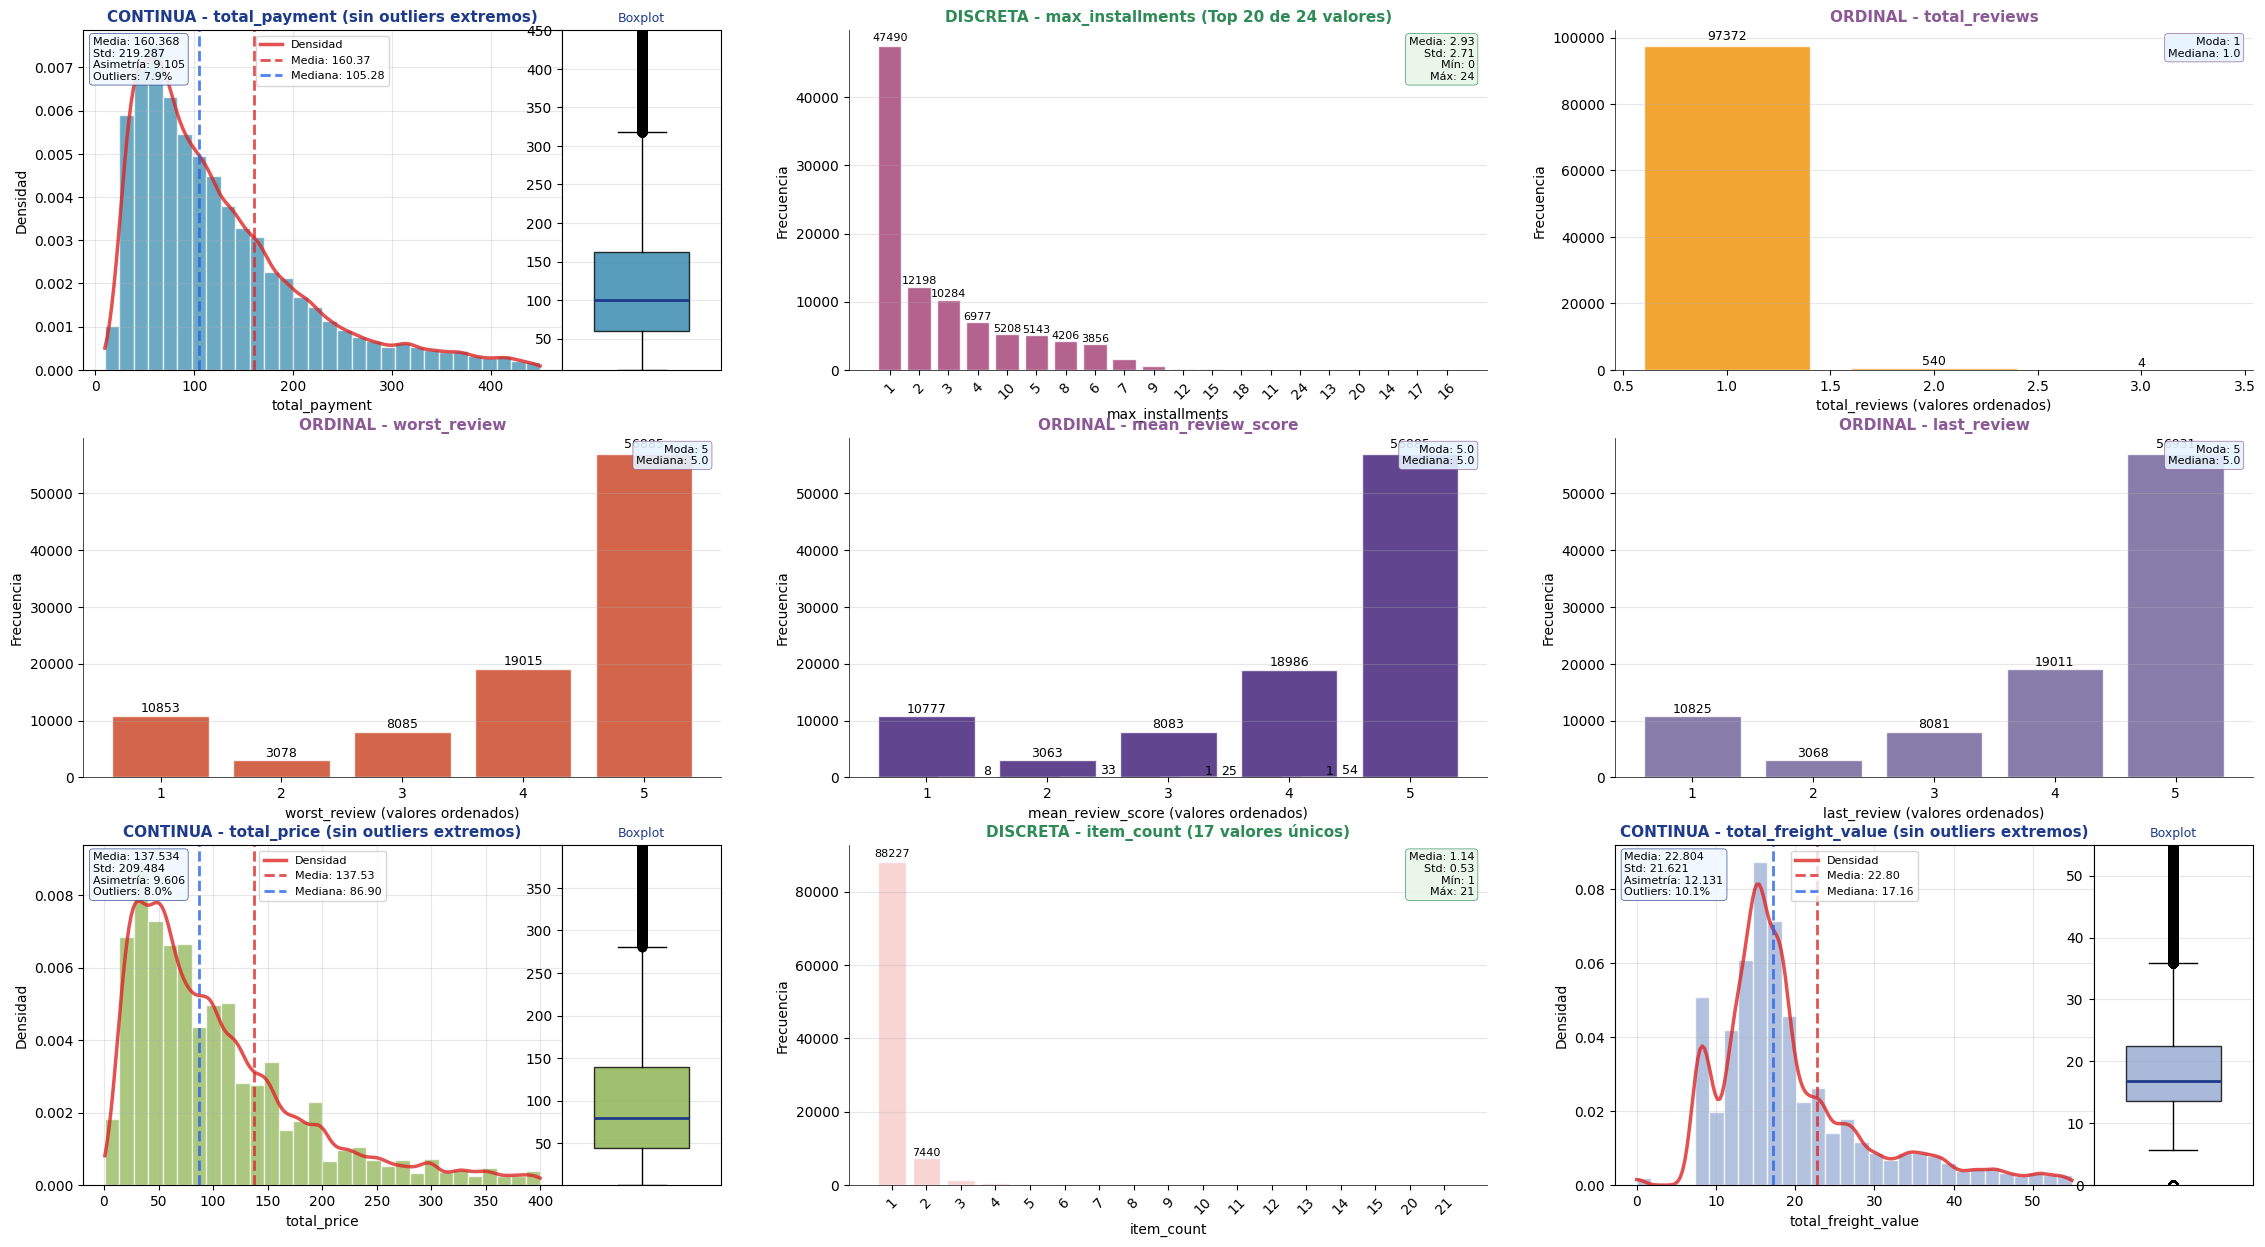

In [17]:
from utils import graficar_numericas

graficar_numericas(df, variables_numericas, figsize=(28, 15))

Con estas variables podemos sacar mas informacion.
- 'total_payment': Podemos ver que la media de dinero gastado por cliente es de 160, con una distribucion sesgada con una cola que va hacia valores mas altos, llegando a aproximadamente 16.000.

- 'max_installments': La siguiente grafica nos indica el numero de pagos por compra. Siendo este en su inmensa mayoria de un solo pago y decreciente hasta llegar a 24 meses (2 años).

- 'total_reviews': esta grafica indica el numero de reviews por cliente, esta grafica unicamente nos indica que la mayoria de clientes ponen una unica review por articulo, los que tienen mas de una indican que cambiaron la review posteriormente, probablemente por una resolucion de su incidencia.

- 'worst_review': indica el valor de la peor review de un cliente. aproximadamente un 65% deja una review de 5 estrellas, el siguiente valor es de 4 y el tercero es el valor mas negativo 1 estrella. Esto probablemente indica un grado de satisfaccion muy bajo, para indicar una queja, y probablemente este muy relacionado con nuestro target.

- 'mean_review_score': esta es una grafica que unicamente nos indica la media de las reviews para clientes que tengan mas de una review. Podria tener una alta correlacion con el resto de variables de review, por lo tanto es importante tenerla en cuenta y eliminarla si añade ruido innecesario.

- ´last_review': esta indica el valor de la ultima review de un cliente, se parece mucho a las anteriores dos variables, por lo tanto habra que revisar si unicamente añade ruido. En caso de que las tres variables fuesen redundantes, esta sería la que prevalece, dado que es la ultima review que ha dejado el cliente y la que mas influye en su percepcion final del servicio.

- 'total_price': Nos indica el coste total de cada producto con el envio incluido. Podemos observar que tiene una distribucion parecida a 'total_payment', pero con valores mas altos. Mas adelante, hay que revisar estas dos variables, junto con 'total_freight_value' debido a su alto riesgo de colinealidad y añadir ruido al modelo.

- 'item_count': la mayoria de clientes han comprado un solo producto por pedido, esto no nos indica mucho y habra que revisar la relacion con el resto, dado que podria ser poco influyente en nuestro modelo.

- ´total_freight_value': esta variable nos indicael precio a pagar por el envio. La media suele ser de 22.80. Como he mencionado antes hay que comprobar si esta variable es redundante con las otras dos y en caso de que lo sea eliminarla.